In [8]:
import os
import gym
import numpy as np
import pandas as pd

from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO, TD3
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv,VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from neo_finrl.env_fx_trading.env_fx import tgym

env_name ="TradingGym-v0"
env = gym.make(env_name)
check_env(env)

initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-16 00:00:00 -> 2017-01-20 23:55:00 length: 1440


In [9]:

env_name ="TradingGym-v0"
def train(df, total_timesteps,model_name, num_cpu = 4, **policy_kwargs):
    # num_cpu Number of processes to use
    # Create the vectorized environment
    # env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

    # Stable Baselines provides you with make_vec_env() helper
    # which does exactly the previous steps for you.
    # You can choose between `DummyVecEnv` (usually faster) and `SubprocVecEnv`
    # env = make_vec_env(t, n_envs=num_cpu, seed=0, vec_env_cls=DummyVecEnv)
    env = DummyVecEnv([lambda: tgym(df=df) for _ in range(num_cpu)] )
    # Automatically normalize the input features and reward
    env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)
    if os.path.exists(model_name + '.zip'):
        model = PPO.load(model_name, env=env, )
        print(f'retaining model: {model_name}')
        model.learn(total_timesteps=total_timesteps,**policy_kwargs)
        model.save(model_name)
        env.save("vec_normalize.pkl")
    else:
        print(f'new model: {model_name}')
        model = PPO('MlpPolicy', env=env, **policy_kwargs)
        model.learn(total_timesteps=total_timesteps)
        model.save(model_name)   

model_name = "ppo_fx-2017-5"   
for i in range(0,30): # one year 2017
    
    file = f"./data/split/GBPUSD/weekly/GBPUSD_2017_{i}.csv"
    if os.path.isfile(file):
        print(file)
        df = pd.read_csv(file)
        total_timesteps=250000
        train(df,total_timesteps,model_name)
 

./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-02 01:00:00 -> 2017-01-06 23:55:00 length: 1428
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:

In [ ]:
env

## TD3


In [ ]:

env_name ="TradingGym-v0"
def train(df, total_timesteps,model_name, num_cpu = 4, **policy_kwargs):
    # num_cpu Number of processes to use
    # Create the vectorized environment
    # env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

    # Stable Baselines provides you with make_vec_env() helper
    # which does exactly the previous steps for you.
    # You can choose between `DummyVecEnv` (usually faster) and `SubprocVecEnv`
    # env = make_vec_env(t, n_envs=num_cpu, seed=0, vec_env_cls=DummyVecEnv)
    env = DummyVecEnv([lambda: tgym(df=df)] )
    
    # Automatically normalize the input features and reward
    env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)
    if os.path.exists(f'output/model/{model_name}.zip'):
        model = TD3.load(model_name, env=env, **policy_kwargs)
        print(f'retaining model: {model_name}')
        model.learn(total_timesteps=total_timesteps, tb_log_name=f'output/tb_log/{model_name}')
        model.save(model_name)
        env.save("vec_normalize.pkl")
    else:
        print(f'new model: {model_name}')
        model = TD3('MlpPolicy', env=env, **policy_kwargs)
        model.learn(total_timesteps=total_timesteps, tb_log_name=f'output/tb_log/{model_name}')
        model.save(model_name)   
        

model_name = "td3_fx-2017-7"   
for i in range(0,1): # one year 2017
    
    file = f"./data/split/GBPUSD/weekly/GBPUSD_2017_{i}.csv"
    if os.path.isfile(file):
        print(file)
        df = pd.read_csv(file)
        total_timesteps=2000
        policy_kwargs ={}
        train(df,total_timesteps,model_name, **policy_kwargs)

./data/split/GBPUSD/weekly/GBPUSD_2017_0.csv
./data/split/GBPUSD/weekly/GBPUSD_2017_1.csv
./data/split/GBPUSD/weekly/GBPUSD_2017_2.csv
initial done:
observation_list:['Open', 'High', 'Low', 'Close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-01-16 00:00:00 -> 2017-01-20 23:55:00 length: 1440
plotting...


c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
c:\github\NeoFinRL\.venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn

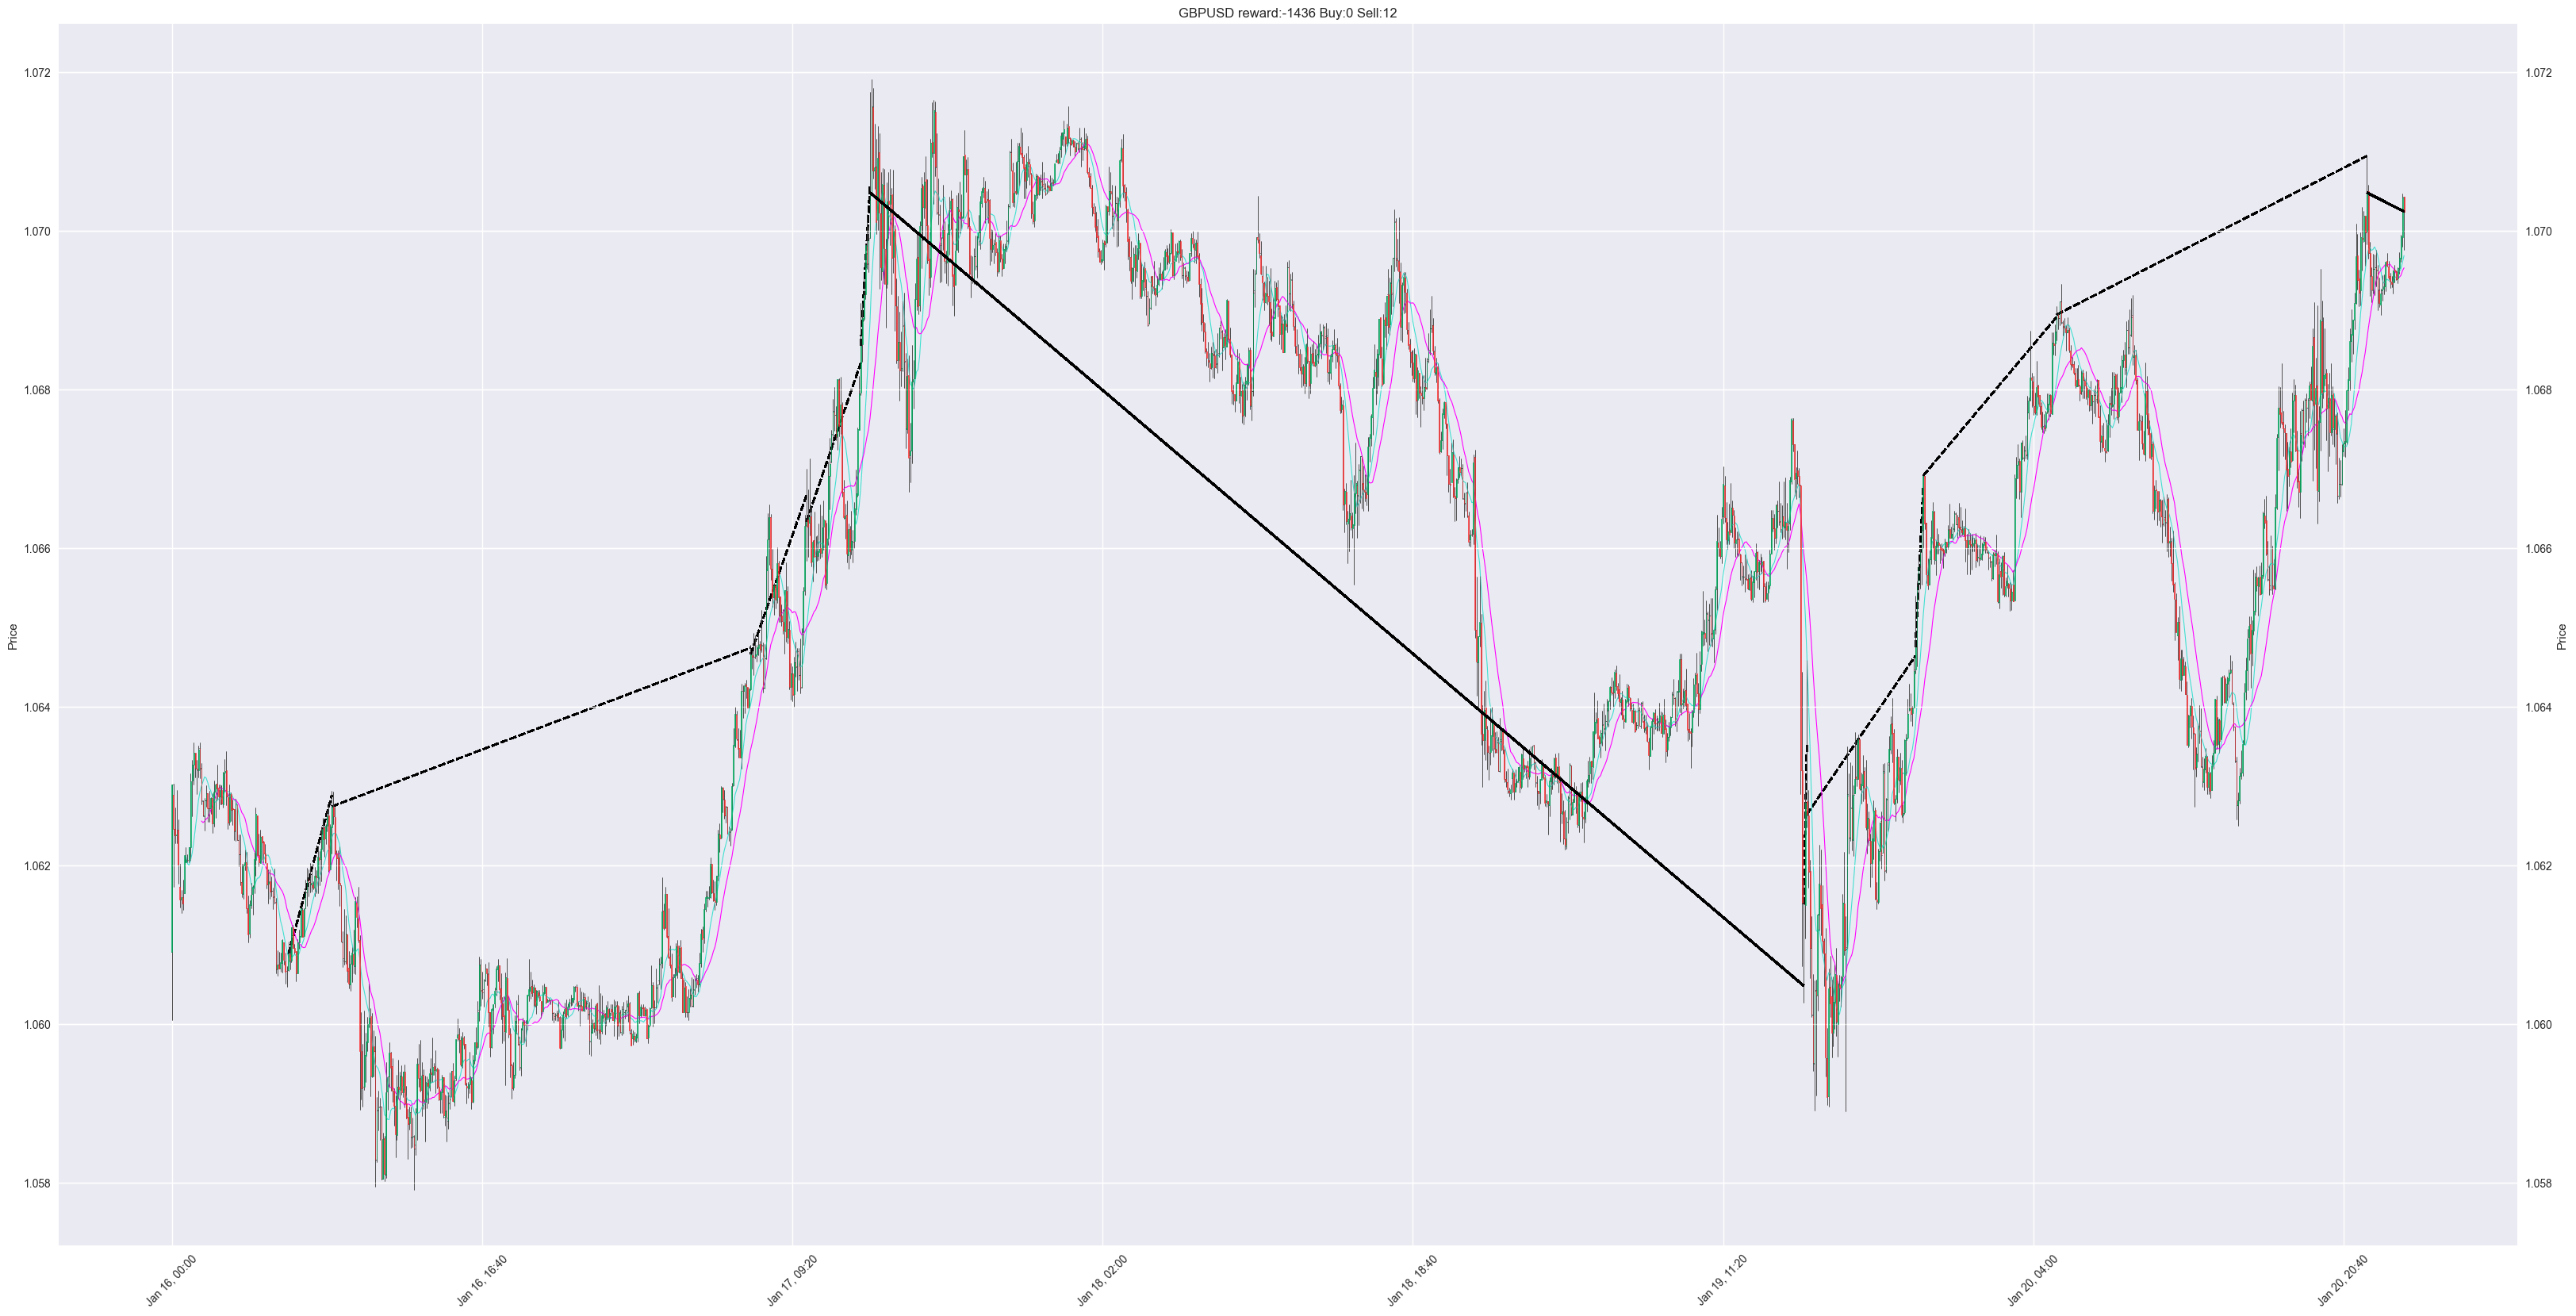

In [8]:
from stable_baselines3 import SAC
model_name ="sac_fx-2017-8"
training = True
for i in range(0,3): # one year 2017
    file = f"./data/split/GBPUSD/weekly/GBPUSD_2017_{i}.csv"
    if os.path.isfile(file):
        print(file)
        df = pd.read_csv(file)

env = tgym(df)
if training:
    model = SAC("MlpPolicy", env, verbose=1,tensorboard_log=f'data/tensorboard/{model_name}' )
    model.learn(total_timesteps=2000) 
    model.save(f"data/models/{model_name}.zip")

    del model # remove to demonstrate saving and loading

model = SAC.load(f"data/models/{model_name}.zip")

done = False
obs = env.reset()
while not done:    
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
env.render(mode='graph')